In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# настроим seaborn и установим стиль whitegrid
sns.set(style='whitegrid')

In [2]:
from urllib.parse import urlencode
import requests
# Чтобы загрузить данные в Jupyter Notebook, используем api Яндекс.Диска.
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 

In [3]:
# в переменную public_key сохраним ссылку на Яндекс.Диска, где находятся данные для скачивания
# сохраним ссылку на таблицу olist_customers_datase.csv и сохраним в переменную customers_df
public_key = 'https://disk.yandex.ru/d/FUi5uSd6BfG_ig' 

final_url = base_url + urlencode(dict(public_key=public_key)) 
customers_df = pd.read_csv(requests.get(final_url).json()['href'])
customers_df.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


 olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей

customer_id — позаказный идентификатор пользователя

customer_unique_id —  уникальный идентификатор пользователя  (в идеальных данных не может быть двух пользователей с одинаковым значением, является уникальным айдишником пользователя)

customer_zip_code_prefix —  почтовый индекс пользователя

customer_city —  город доставки пользователя

customer_state —  штат доставки пользователя

In [4]:
# в переменную public_key сохраним ссылку на Яндекс.Диска, где находятся данные для скачивания
# сохраним ссылку на таблицу olist_order_items_dataset.csv и сохраним в переменную order_items_df
public_key = 'https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw' 

final_url = base_url + urlencode(dict(public_key=public_key)) 
order_items_df = pd.read_csv(requests.get(final_url).json()['href'])
order_items_df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


olist_order_items_dataset.csv —  товарные позиции, входящие в заказы

order_id —  уникальный идентификатор заказа (номер чека)

order_item_id —  идентификатор товара внутри одного заказа (не содержит информацию о количестве товаров)

product_id —  уникальный идентефикатор товара (аналог штрихкода)

seller_id — уникальный идентефикатор производителя товара

shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

price —  цена за единицу товара

freight_value —  вес товара

In [5]:
# в переменную public_key сохраним ссылку на Яндекс.Диска, где находятся данные для скачивания
# сохраним ссылку на таблицу olist_orders_dataset.csv и сохраним в переменную orders_df
public_key = 'https://disk.yandex.ru/d/t9Li4JOfgxuUrg' 

final_url = base_url + urlencode(dict(public_key=public_key)) 
orders_df = pd.read_csv(requests.get(final_url).json()['href'])
orders_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


olist_orders_dataset.csv —  таблица заказов

order_id —  уникальный идентификатор заказа (номер чека)

customer_id —  позаказный идентификатор пользователя

order_status —  статус заказа

order_purchase_timestamp —  время создания заказа

order_approved_at —  время подтверждения оплаты заказа

order_delivered_carrier_date —  время передачи заказа в логистическую службу

order_delivered_customer_date —  время доставки заказа

order_estimated_delivery_date —  обещанная дата доставки

# Посмотрим форму таблицы, типы данных и есть ли пропущенные значения

In [6]:
# таблица customers_df
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
# таблица order_items_df
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [8]:
# таблица orders_df
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [9]:
# пропущенные значения есть только в одной таблице
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [10]:
# посмотрим, на количество заказов в разбивке по статусам
orders_df.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [11]:
# так как у нас есть колонки с датой, но у них тип данных object
# лучше сразу поменяем тип данных на дату, чтобы легче было работать с этими столбцами

orders_df = orders_df.astype({'order_purchase_timestamp': 'datetime64',
                     'order_approved_at': 'datetime64',
                     'order_delivered_carrier_date': 'datetime64',
                     'order_delivered_customer_date': 'datetime64',
                     'order_estimated_delivery_date': 'datetime64'})

In [12]:
# проверим, поменялся ли тип данных на дату
orders_df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

# Предварительное исследование данных

Чтобы понять, с каким статусом заказ будет считаться покупкой, необходимо определить, когда переходит право собственности на товар. Покупка означает вступление во владение данным активом, собственностью, предметом или правом, заплатив заранее определенную сумму денег для успешного завершения транзакции. При доставке право собственности переходит в момент вручения товара покупателю или указанному им лицу. Таким образом, до того, как товар будет передан клиенту, владеет и несет ответственность за него компания. Значит в определении понятия покупка, совершенная клиентом, нам подойдут только те заказы, которые уже переданы пользователю, то есть со статусом delivered(доставлен). Тогда как моментом совершения покупки можно считать фактическую дату оплаты заказа. Следовательно, покупкой будут считаться те товары, которые были оплачены и доставлены до пользователя.

Уникальные статусы заказов в таблице orders_df:

Есть такие уникальные заказы, как created —  создан, approved —  подтверждён, invoiced —  выставлен счёт, processing —  в процессе сборки заказа, shipped —  отгружен со склада.

delivered —  доставлен пользователю. В данных есть заказы(14 штук) со статусом delivered(доставлен), но нет даты оплаты. Будем считать, что это ошибка в данных и дата просто не загрузилась. Так же в заказах со статусом delivered есть заказы(8 штук), у которых нет даты доставки, хотя по статусу знаем, что клиенту товар был доставлен. Будем считать, что это тоже просто ошибка в данных.

unavailable —  недоступен. Это означает, что товар не доступен(к примеру, его нет на складе) и пользователь не сможет получить заказ, следовательно ему вернут потраченные средства, если он оплатил.

canceled —  отменён. Все заказы со статусом canceled(отмененные) не считаем покупкой, совершенной пользователем, даже если оплата была произведена(в данных есть заказы, которые отменены,  но оплачены) или были доставлены(есть заказы, которые были доставлены, но отменены, скорее всего не понравилось качество товара или не вовремя доставили), так как пользователь отказался от заказа и ему будут возвращены деньги.

Найдем эти 14 заказов, где есть статус delivered(доставлен), но нет даты оплаты.
Можно заметить, что очень много заказов(8 штук) было сделано 2017-02-18(колонка order_purchase_timestamp)
и еще 3 заказа за день до этого и 1 после.
Явно есть какая-то взаимосвязь, скорее всего в этот день плохо работал сайт или по какой-то другой причине не внеслась дата,
но так как заказы были доставлены пользователю, оставим эти данные и не будем их удалять.

In [13]:
orders_df[orders_df['order_approved_at'].isna()].query('order_status == "delivered"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


Посмотрим на заказы со статусом delivered(8 штук), у которых нет даты доставки. Можем предположить, что клиент лично забрал товар и не воспользовался доставкой. Так как можно заметить, что сделан заказ и оплачен в один день, и они отличаются примерно на 20 минут, но точно мы сказать не можем, может это просто ошибка в данных

In [14]:
orders_df[orders_df.order_delivered_customer_date.isna()].query('order_status == "delivered"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


Посмотрим на заказы со статусом canceled(6 штук), у которых есть дата доставки. Можем предположить, что товар был доставлен клиенту, поэтому есть дата доставки, но клиенту не понравилось качество товара(к примеру, может что-то сломано было) и он отказался от заказа и отменил его. А может, слишком поздно или рано доставили, что тоже могло повлиять на то, что клиент отказался.

In [15]:
orders_df.query('order_status == "canceled"').dropna(subset=['order_delivered_customer_date'])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2921,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09
8791,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30
58266,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29
59332,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25
94399,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08


# Сколько у нас пользователей, которые совершили покупку только один раз?

Необходимо найти то, когда пользователь совершил покупку только один раз. В экономическом смысле покупка - это процесс приобретения товаров или услуг для достижения своих целей. Покупкой можно называть то, когда приобретают один или несколько товаров в одном чеке. Понадобится таблицы customers_df и orders_df. Так как customer_id — позаказный идентификатор пользователя, customer_unique_id - уникальный номер пользователя, а из таблицы orders_df понадобится статус заказа.

Чтобы понять, с каким статусом заказ будет считаться покупкой, необходимо определить, когда переходит право собственности на товар. Покупка означает вступление во владение данным активом, собственностью, предметом или правом, заплатив заранее определенную сумму денег для успешного завершения транзакции. При доставке право собственности переходит в момент вручения товара покупателю или указанному им лицу. Таким образом, до того, как товар будет передан клиенту, владеет и несет ответственность за него компания. Значит нам подойдут только те заказы, которые уже переданы пользователю, то есть со статусом delivered(доставлен).

In [16]:
# объединим orders_df с customers_df, не будем брать по всем столбцам, а возьмем только нужные, inner join

customer_purchases = pd.merge(customers_df[['customer_unique_id', 'customer_id']],
                             orders_df[['customer_id', 'order_status']],
                             on='customer_id')

In [17]:
# найдем кол-во пользователей, совершивших одну покупку
# оствим только доставленные заказы, сгруппируем по customer_unique_id и посчитаем кол-во позаказных идентификаторов 
# далее отфильтруем и оставим только 1

customers_with_one_purchase = customer_purchases \
                                .query('order_status == "delivered"') \
                                .groupby('customer_unique_id') \
                                .agg({'customer_id': 'count'}) \
                                .query('customer_id == 1') \
                                .shape[0]
print(f'Вывод: {customers_with_one_purchase} пользователей совершили покупку только один раз.')

Вывод: 90557 пользователей совершили покупку только один раз.


# Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Заказ не считается доставленным, если не имеет статус delivered(доставлен). Следовательно, у таких заказов не будет времени доставки заказа пользователю, данные которого хранятся в колонке order_delivered_customer_date. Так же не будем использовать заказы, со статусом created(так как такие заказы только создаются).

В данных есть заказы со статусом canceled(6 штук), у которых есть дата доставки. Хоть такие заказы и были отменены, но их можно считать доставленными. Так как до клиента они дошли, но он мог отказаться от заказа при получении. Поэтому целесообразно использовать заказы, у которых нет даты доставки.

Так как будем смотреть не доставленные заказы по разным причинам, то будем использовать дату из колонки order_purchase_timestamp(время создание заказа). Это дата, когда пользователь создал заказ и если в дальнейшем он не был доставлен, не важно по какой причине, то такие данные будут нам интересны для исследования.

In [18]:
# оставим только те заказы, у которых нет времени доставки пользователю и сохраним таблицу в новую переменную
orders_without_deliver = orders_df[orders_df['order_delivered_customer_date'].isna()]

Проверим, заказы с какими статусами не доставлялись. Можно заметить, что есть заказы со статусом delivered(доставлен). Если заказ доставлен и нет даты, значит ощибка в данных, такие заказы будем считать доставлеными до пользователя.

In [19]:
orders_without_deliver.order_status.value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

In [20]:
# отфильтруем таблицу, убрав заказы со статусом delivered и created
orders_without_deliver = orders_without_deliver.query('order_status != "delivered" and order_status != "created"')

In [21]:
# чтобы удобнее было работать с данными, создадим новую колонку, куда поместим год и месяц
# чтобы в дальнейшем посчитать уникальное количество месяцев
orders_without_deliver['year_month'] = orders_without_deliver['order_purchase_timestamp'].dt.strftime('%Y-%m')

In [22]:
# найдем общее среднее количество недоставленных заказов за эти месяцы
# сгруппируем по колонке year_month, посчитаем количество заказов в этих месяцах и посчитаем среднее через метод mean()
# округлим среднее до целого

not_delivered_mean = orders_without_deliver.shape[0] / orders_without_deliver.year_month.nunique()
print(f'Вывод: {round(not_delivered_mean)} заказа в месяц в среднем не доставляется')

Вывод: 123 заказа в месяц в среднем не доставляется


Далее выведем детализацию по причинам, то есть узнаем общее количество недоставленных заказов по разным статусам, а также найдем сколько заказов в месяц в среднем не доставляется по разным причинам

In [23]:
# отсортируем по убыванию и проставим индексы по порядку
mean_by_status = orders_without_deliver \
                .groupby('order_status', as_index=False) \
                .agg({'customer_id': 'count'}) \
                .rename(columns={'customer_id': 'quantity'}) \
                .sort_values('quantity', ascending=False) \
                .reset_index(drop=True)

In [24]:
# найдем среднее, разделив общее количество недоставленных заказов по разным статусам на количество исследуемых месяцев
# округлим результат среднего до двух знаков после запятой
mean_by_status['mean_by_status'] = round(mean_by_status.quantity / orders_without_deliver.year_month.nunique(), 2)

In [25]:
# колонка с количеством недоставленных товаров нам больше не нужна, так как нам необходимо найти только среднюю
# поэтому удалим столбец quantity
mean_by_status = mean_by_status.drop('quantity', axis=1)

In [26]:
# так мы получили таблицу с детализацией причин заказов по месяцам, которые в среднем не доставляются по разным причинам
mean_by_status

,order_status,mean_by_status
0,shipped,46.12
1,canceled,25.79
2,unavailable,25.38
3,invoiced,13.08
4,processing,12.54
5,approved,0.08


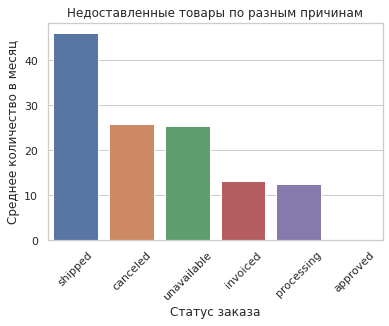

In [27]:
# нарисуем график, где покажем различия в недоставленных товарах по разным причинам
# больше всего недоставленных товаров по причине того, что они отгружены со склада(shipped)
sns.barplot(data=mean_by_status, x='order_status', y='mean_by_status')
plt.title('Недоставленные товары по разным причинам')
plt.xlabel('Статус заказа')
plt.ylabel('Среднее количество в месяц')
plt.xticks(rotation=45);

В итоге можно сделать вывод, что 123 заказа в месяц в среднем не доставляется по разным причинам. Из них больше всего недоставленных товаров по причине того, что они отгружены со склада(shipped).

# По каждому товару определить, в какой день недели товар чаще всего покупается.

Необходимо найти то, в какой день недели товар чаще всего покупается. Значит, смотреть надо со стороны компании, когда товар был продан. Таким образом, товар будет считаться проданным, когда покупатель заплатил за него деньги. Следовательно, день недели продажи будет определяться по дате оплаты(колонка order_approved_at). Именно в этот момент единица товара становится недоступна для других, так как одну единицу товара два раза продать не получится. 

Интересовать будут все заказы, кроме заказов со статусом unavailable(так как они недоступны) и created(заказ только создается). Остальные нам подходят, если есть фактический день оплаты, даже если не были доставлены. Так как на какой-то момент времени они все же были проданы, хоть и застряли в каком-нибудь статусе и дальнейшего движения не было. Например, даже если пользователь в итоге отказался (статус canceled) от товара, то он все же был продан в какой-то день. И для статистики по дням недели нам такие данные подойдут.

In [28]:
# объединим 2 таблицы (order_items_df и orders_df), inner join

product_by_day = pd.merge(order_items_df[['order_id', 'product_id']],
                       orders_df[['order_id', 'order_status', 'order_approved_at']],
                       on='order_id')

In [29]:
# перезапишем данные, отфильтруя статусы, которые нам не подходят, так как не считаются покупкой
product_by_day = product_by_day.query('order_status != "created" & order_status != "unavailable"')

In [30]:
# сначала проверим, во всех ли заказах есть дата оплаты
product_by_day.isna().sum()

order_id              0
product_id            0
order_status          0
order_approved_at    15
dtype: int64

In [31]:
# найдем эти 15 заказов без даты оплаты и посмотрим их статус
product_by_day[product_by_day.order_approved_at.isna()].order_status.value_counts()

delivered    15
Name: order_status, dtype: int64

In [32]:
# нам необходимо удалить эти данные без даты оплаты, так как мы не сможем определить, в какой день недели поступила оплата
# для начала посмотрим, сколько всего строк было изначально, чтобы проверить, были ли удалены эти 15 строк
product_by_day.shape[0]

112643

In [33]:
# удаляем строки без дат оплаты, используя dropna и параметр subset, чтобы удалить только по этой колонке
product_by_day = product_by_day.dropna(subset=['order_approved_at'])

In [34]:
# можем убедиться, что сделали все правильно и 15 строк были удалены
product_by_day.shape[0]

112628

In [35]:
# создадим новую колонку и запишем в нее название дня недели, когда была совершена покупка
product_by_day['name_of_day'] = product_by_day.order_approved_at.dt.day_name()

In [36]:
# в переменную сохраним таблицу о том, в какой день недели товар чаще всего покупается
# в начале сгруппировали по айди товара и дням недели, посчитали количество купленных товаров по дням
# отсортировали в порядке убывания, тем самым выше будет находится самый часто покупаемый товар
# далее воспользуемся drop_duplicates с параметром subset='product_id', удалим повторяющиеся значения по колонке product_id
# так как первым вхождением будет день недели, в котором больше всего раз товар был куплен
# остальные повторы по айди товара удалятся, которые с меньшими покупками, чем первое вхождение
# и в конце удалим столбец с количеством заказов, так как мы ищем только дни недели, когда чаще всего покупался товар

product_by_day = product_by_day \
                    .groupby(['product_id', 'name_of_day'], as_index=False) \
                    .agg({'order_id': 'count'}) \
                    .sort_values('order_id', ascending=False) \
                    .drop_duplicates(subset='product_id') \
                    .drop('order_id', axis=1)

In [37]:
# полученна таблица, в которой хранится информация о том, в какой день недели товар чаще всего покупается
product_by_day

,product_id,name_of_day
41078,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday
20150,53b36df67ebb7c41585e8d54d6772e08,Tuesday
15931,422879e10f46682990de24d770e7f83d,Tuesday
36571,99a4788cb24856965c36a24e339b6058,Tuesday
13058,368c6c730842d78016ad823897a372db,Thursday
...,...,...
23974,63dfa8b12200610ed7b5e41d3c888a25,Saturday
23978,63e51e65ec59b56039c6427eed73dcf0,Tuesday
23979,63eb97106bfe47fe857edcf78f3e3e08,Saturday
23989,63f52009dc3ddb733394e80183aed0f0,Saturday


In [38]:
# теперь выясним, сколько товаров с максимальной продажей по дням недели
product_by_day.name_of_day.value_counts()

Tuesday      6109
Friday       5667
Thursday     4943
Monday       4710
Wednesday    4630
Saturday     4088
Sunday       2795
Name: name_of_day, dtype: int64

Теперь нарисуем график и посмотрим, в какие дни недели продается максимальное количество одного товара

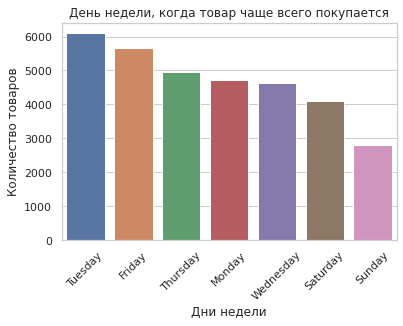

In [39]:
# отсортируем график так, чтобы слева был день недели когда больше всего было продано различных товаров
sns.countplot(data=product_by_day, x='name_of_day', order=product_by_day['name_of_day'].value_counts().index)
plt.title('День недели, когда товар чаще всего покупается')
plt.xlabel('Дни недели')
plt.ylabel('Количество товаров')
plt.xticks(rotation=45);

В итоге можно сделать вывод, что вторник(Tuesday) является днем недели, когда происходит больше всего максимальных продаж по разным товарам. 6109 товаров с максимальной продажей во вторник.

# Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 

Необходимо найти среднее число покупок по пользователям в неделю и по месяцам. Покупка совершается тогда, когда есть факт оплаты и происходит передача прав собственности. При доставке право собственности переходит в момент вручения товара покупателю или указанному им лицу. Следовательно, определять день недели, когда свершился факт покупки, будем по времени оплаты заказа клиентом, которое находится в колонке order_approved_at. Таким образом, нам подойдут заказы только со статусом delivered, так как они фактически оплачены и доставлены. 

Так же в заказах со статусом delivered есть заказы(8 штук), у которых нет даты доставки. Будем считать, что это ошибка в данных и дата просто не загрузилась. Так как заказы были доставлены пользователю(так как у них статус delivered), оставим эти данные и не будем их удалять, потому что знаем дату оплаты.

В данных есть заказы(14 штук) со статусом delivered(доставлен), но нет даты оплаты. Это тоже ошибка в данных, но такие заказы мы не можем учитывать, так как не знаем дату оплаты клиентом. Следовательно, не узнаем в каком месяце или на какой неделе была совершена оплата, такие данные лучше удалить.

посчитаем количество купленных товаров по каждому чеку

In [40]:
# нужна информация по купленным товарам, данные по чекам находятся в таблице order_items_df
# сгруппируем по чекам, посчитаем количество купленных товаров

purchases_in_orders = order_items_df \
                            .groupby('order_id', as_index=False) \
                            .agg({'product_id': 'count'}) \
                            .rename(columns={'product_id': 'quantity'})
purchases_in_orders.head()

,order_id,quantity
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1


Далее нам необходимо объеденить несколько таблиц, так как надо связать чеки с пользователями. В начале объединим полученную таблицу purchases_in_orders по номеру чека с таблицей orders_df, в которой находятся данные по позаказному идентификатору пользователя. Далее, по этому позаказному идентификатору пользователя свяжем объединенную таблицу с customers_df. Тем самым получим таблицу, где каждому пользователю будет соотносится сделанный заказ.

In [41]:
# объединим таблицы purchases_in_orders и orders_df, inner join

purchases_in_orders = pd.merge(purchases_in_orders,
                              orders_df[['order_id', 'customer_id', 'order_status', 'order_approved_at']],
                              on='order_id')
purchases_in_orders.head(2)

,order_id,quantity,customer_id,order_status,order_approved_at
0,00010242fe8c5a6d1ba2dd792cb16214,1,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,1,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 11:05:13


In [42]:
# зная, что необходимые данные нужны только со статусом delivered, отфильтруем полученную таблицу
purchases_in_orders = purchases_in_orders.query('order_status == "delivered"')

In [43]:
# проверим как получилось, посмотрим какие статусы остались
purchases_in_orders.order_status.unique()

array(['delivered'], dtype=object)

Зная, что у нас есть заказы без даты оплаты, таких 14 штук. Так как в них мы не сможем определить, в какой день была совершена покупка, то такие заказы следует удалить из таблицы.

In [44]:
# поэтому для проверки узнаем, сколько строк было с этими заказами, а после удаления должно стать на 14 меньше
purchases_in_orders.shape

(96478, 5)

In [45]:
# удаляем строки без даты доставки и смотрим на колчество оставшихся строк, стало на 8 меньше
purchases_in_orders = purchases_in_orders.dropna(subset=['order_approved_at'])
purchases_in_orders.shape

(96464, 5)

In [46]:
# теперь объединим purchases_in_orders с customers_df, inner join

purchases_in_orders = pd.merge(purchases_in_orders[['order_id', 'quantity', 'customer_id', 'order_approved_at']],
                              customers_df[['customer_id', 'customer_unique_id']],
                              on='customer_id')
purchases_in_orders.head(2)

,order_id,quantity,customer_id,order_approved_at,customer_unique_id
0,00010242fe8c5a6d1ba2dd792cb16214,1,3ce436f183e68e07877b285a838db11a,2017-09-13 09:45:35,871766c5855e863f6eccc05f988b23cb
1,00018f77f2f0320c557190d7a144bdd3,1,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 11:05:13,eb28e67c4c0b83846050ddfb8a35d051


Для того, чтобы выяснить, сколько в среднем в месяце пользователь совершает покупки, необходимо узнать, сколько всего прошло месяцев.

In [47]:
# сделаем таблицу с уникальными месяцами и узнаем количество дней в этих месяцах
# чтобы потом найти количество недель в месяце, разделим количество дней на 7
month_day = pd.DataFrame(purchases_in_orders.order_approved_at \
                         .dt.to_period('M').unique(), columns=['month_uniq'])

In [48]:
# отсортируем по порядку дату
month_day = month_day.sort_values('month_uniq')

In [49]:
# узнаем количество дней и запишем данные в новую колонку
month_day['days'] = month_day.month_uniq.dt.days_in_month
month_day.head()

,month_uniq,days
22,2016-09,30
20,2016-10,31
21,2016-12,31
17,2017-01,31
4,2017-02,28


В первом и последнем месяце количество дней было не полным, значит нам необходимо исправить количество дней на то, сколько реально прошло. Так как первая покупка была совершена не первого числа, а последняя - не в конце месяца.

In [51]:
month_day.iloc[0, 1] = month_day.iloc[0, 1] - purchases_in_orders.order_approved_at.min().day
month_day.iloc[-1, 1] = purchases_in_orders.order_approved_at.max().day
month_day.head()

,month_uniq,days
22,2016-09,15
20,2016-10,31
21,2016-12,31
17,2017-01,31
4,2017-02,28


In [52]:
# найдем количество недель в месяце, разделив дни на 7, и сохраним информацию в новую колонку
month_day['week_in_month'] = month_day.days / 7
month_day.head()

,month_uniq,days,week_in_month
22,2016-09,15,2.142857
20,2016-10,31,4.428571
21,2016-12,31,4.428571
17,2017-01,31,4.428571
4,2017-02,28,4.000000


Выясним, сколько покупок в среднем совершают пользователи в месяц

In [53]:
# сгруппируем по уникальному номеру пользователя и посчитаем, сколько всего было сделано покупок пользователями
# отсортируем полученные данные так, чтобы бы выше находились те пользователи, которые совершают больше покупок

customer_purchases_by_month = purchases_in_orders \
                                .groupby('customer_unique_id', as_index=False) \
                                .agg({'quantity': 'sum'}) \
                                .sort_values('quantity', ascending=False)

Теперь найдем среднее количество покупок, разделив общее количество покупок на количество прошедших месяцев

In [54]:
# используем таблицу month_day, в которой находится информация о месяцах, посчитаем их количество
# округлим до 2 знаков после запятой
customer_purchases_by_month['mean_by_month'] = round(customer_purchases_by_month.quantity / month_day.month_uniq.nunique(), 2)

In [55]:
# удалим столбец quantity, так как он больше не нужен
customer_purchases_by_month = customer_purchases_by_month.drop('quantity', axis=1)

In [56]:
# так получили таблицу, где в столбце mean_by_month находится среднее количество покупок в месяц
customer_purchases_by_month.head()

,customer_unique_id,mean_by_month
73118,c8460e4251689ba205045f3ea17884a1,1.04
25309,4546caea018ad8c692964e3382debd19,0.91
71558,c402f431464c72e27330a67f7b94d4fb,0.87
38578,698e1cf81d01a3d389d96145f7fa6df8,0.87
5622,0f5ac8d5c31de21d2f25e24be15bbffb,0.78


Теперь выясним, сколько покупок в среднем совершают пользователи в неделю

In [57]:
# сгруппируем по уникальному номеру пользователя и посчитаем, сколько всего было сделано покупок пользователями
# отсортируем полученные данные так, чтобы бы выше находились те пользователи, которые совершают больше покупок

customer_purchases_by_week = purchases_in_orders \
                                .groupby('customer_unique_id', as_index=False) \
                                .agg({'quantity': 'sum'}) \
                                .sort_values('quantity', ascending=False)

Найдем среднее количество покупок, раздлив общее количество покупок на количество прошедших недель

In [58]:
# используем таблицу month_day, в которой находится информация о неделях по месяцам, проссумируем ее
# округлим до 2 знаков после запятой
customer_purchases_by_week['mean_by_week'] = round(customer_purchases_by_week.quantity / month_day.week_in_month.sum(), 2)

In [59]:
# удалим столбец quantity, так как он больше не нужен
customer_purchases_by_week = customer_purchases_by_week.drop('quantity', axis=1)

In [60]:
# так мы получили таблицу, где в столбце mean_by_week находится среднее количество покупок в неделю
customer_purchases_by_week.head()

,customer_unique_id,mean_by_week
73118,c8460e4251689ba205045f3ea17884a1,0.25
25309,4546caea018ad8c692964e3382debd19,0.22
71558,c402f431464c72e27330a67f7b94d4fb,0.20
38578,698e1cf81d01a3d389d96145f7fa6df8,0.20
5622,0f5ac8d5c31de21d2f25e24be15bbffb,0.18


In [61]:
# посмотрим, какая медиана по средним покупкам в месяц
customer_purchases_by_month.mean_by_month.median()

0.04

В итоге можно сделать вывод, что пользователи не часто покупают товары у компании. Можно заметить, что только у одного пользователя есть в среднем одна покупка в месяц, а у других клиентов меньше одной покупки в среднем в месяц. Тогда как медиана по средним покупкам в месяц составляет 0,04. Это говорит нам о том, что больше половины пользователей совершило только одну покупку.

Такие результаты могут говорить нам о том, что покупатели редко делают больше одного заказа. Это может быть связано с видом бизнеса(Например: товар, который на долго хватает) либо компания не может ударжать своих клиентов. Покупая один раз, они больше не хотят возвращаться.

# Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

Когорта — это группа людей, имеющих что-то общее. В когортном анализе мы отслеживаем эти группы пользователей с течением времени, чтобы выявить некоторые общие закономерности или модели поведения. В этой задаче проанализируем user retention (Удержание клиентов). Это имеет решающее значение для любого бизнеса, поскольку гораздо дешевле удержать существующих клиентов (с помощью инструментов CRM, скидок для участников и т. д.), чем приобретать новых.

Необходимо провести когортый анализ и выявить когорту с самым высоким retention на третий месяц. Для этого возьмем данные за 2017 год и чтобы увидеть по всем месяцам 2017 года retention на 3й месяц, возьмем еще 3 месяца(январь, февраль, март) из 2018 года, так как данные позволяют нам это сделать.

В данных есть заказы(14 штук) со статусом delivered(доставлен), но нет даты оплаты. Это ошибка в данных, но такие заказы мы не можем учитывать, так как не знаем дату оплаты клиентом. Следовательно, не узнаем в каком месяце или на какой неделе была совершена оплата, такие данные лучше удалить.

Интересовать будут заказы со статусом delivered, а когорты сформируем по дате фактической оплате заказа.

In [62]:
# отфильтруем данные, оставим заказы со статусом delivered
# и удалим пропущенные значения по колонке order_approved_at, так как мы не сможем определить дату
cohort_analys = orders_df.query('order_status == "delivered"').dropna(subset=['order_approved_at'])

In [63]:
# объединяем таблички cohort_analys и customers_df, inner join

cohort_analys = pd.merge(cohort_analys[['order_id', 'customer_id', 'order_approved_at']],
                        customers_df[['customer_id', 'customer_unique_id']],
                        on='customer_id')

In [64]:
# отфильтруем данные по дате, оставим только 2017 год и первые 3 месяца 2018 года
cohort_analys = cohort_analys.query('order_approved_at > "2017-01" and order_approved_at < "2018-04"')

Посмотрим, какой процент пользователей совершил больше одной покупки

In [65]:
# считаем количество заказов, совершенных пользователем
quantity_orders_by_costumer = cohort_analys.groupby(['customer_unique_id']).agg({'order_id': 'count'})
# считаем, какой процент пользователей совершил больше одного заказа
perc_from_all = ((quantity_orders_by_costumer > 1).sum() / cohort_analys['customer_unique_id'].nunique()).iloc[0]
# вывод: пользователи предпочитают одноразовые приобритения
print(f'{100 * perc_from_all:.2f}% пользователей совершили более одного заказа.')

2.93% пользователей совершили более одного заказа.


In [66]:
# сделаем новую колонку, куда запишем год и месяц оплаты
cohort_analys['order_month'] = cohort_analys.order_approved_at.dt.to_period('M')

In [67]:
# сделаем новую колонку, куда запишем год и месяц первой оплаты
# это быдут названия когорт
cohort_analys['cohort'] = cohort_analys.groupby('customer_unique_id').order_approved_at.transform(min).dt.to_period('M')

In [68]:
# сгруппируем по когорте и месяцу заказа, посчитаем количество уникальных пользователей по группам
# назовем стобец с этими данными quantity
cohort_analys = cohort_analys.groupby(['cohort', 'order_month']) \
              .agg(quantity=('customer_unique_id', 'nunique')) \
              .reset_index(drop=False)

In [69]:
# найдем разницу в годах между заказами, чтобы потом посчитать номер периода, в которых были сделаны покупки
year_diff = cohort_analys.order_month.dt.year - cohort_analys.cohort.dt.year

In [70]:
# считаем разницу между месяцем заказам и первым месяцем заказа
month_diff = cohort_analys.order_month.dt.month - cohort_analys.cohort.dt.month

Теперь найдем номер периода, в котором были покупки и сохраним данные в новую колонку. Нулевым периодом будет период, когда была совершена первая покупка.

In [71]:
cohort_analys['period_number'] = year_diff * 12 + month_diff

In [72]:
# делаем сводную таблицу, используя pivot_table, в индексах - когорты, в колонках - периоды, значение - количество пользователей
cohort_analys = cohort_analys.pivot_table(index='cohort',
                         columns='period_number',
                         values='quantity')

In [73]:
# по полученной таблице можно сделать небольшой вывод, что количество клиентов за год с небольшим увеличилось примерно в 10 раз
# количество клиентов находятся в нулевом периоде, то, сколько их пришло в каждом месяце
cohort_analys

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohort,,,,,,,,,,,,,,,
2017-01,684.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,2.0,2.0,5.0,3.0,1.0
2017-02,1612.0,3.0,4.0,3.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,5.0,2.0,3.0,NaN
2017-03,2511.0,11.0,9.0,9.0,9.0,4.0,4.0,8.0,7.0,3.0,9.0,3.0,5.0,NaN,NaN
2017-04,2233.0,14.0,5.0,4.0,5.0,6.0,8.0,6.0,8.0,4.0,5.0,2.0,NaN,NaN,NaN
2017-05,3453.0,18.0,16.0,10.0,10.0,11.0,14.0,5.0,9.0,9.0,10.0,NaN,NaN,NaN,NaN
2017-06,3044.0,15.0,12.0,13.0,9.0,11.0,11.0,7.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN
2017-07,3710.0,20.0,12.0,7.0,13.0,7.0,12.0,4.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,4081.0,28.0,15.0,11.0,15.0,21.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4026.0,27.0,20.0,13.0,17.0,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Найдем процент по периодам от первой покупки

In [74]:
# берем количество из первого столбца, там по каждой когорте будет находиться максимум, так как этих пользователей и отслеживаем
# чтобы дальше разделить значение по строке на значение по первой колонке
cohort_size = cohort_analys.iloc[:,0]

In [75]:
# тут делаем разделение, чтобы найти процент от максимума
# по каждой строке значение будет разделено на значение из первого столбца этой строки
retention_matrix = cohort_analys.divide(cohort_size, axis = 0)

Нарисуем матрицу

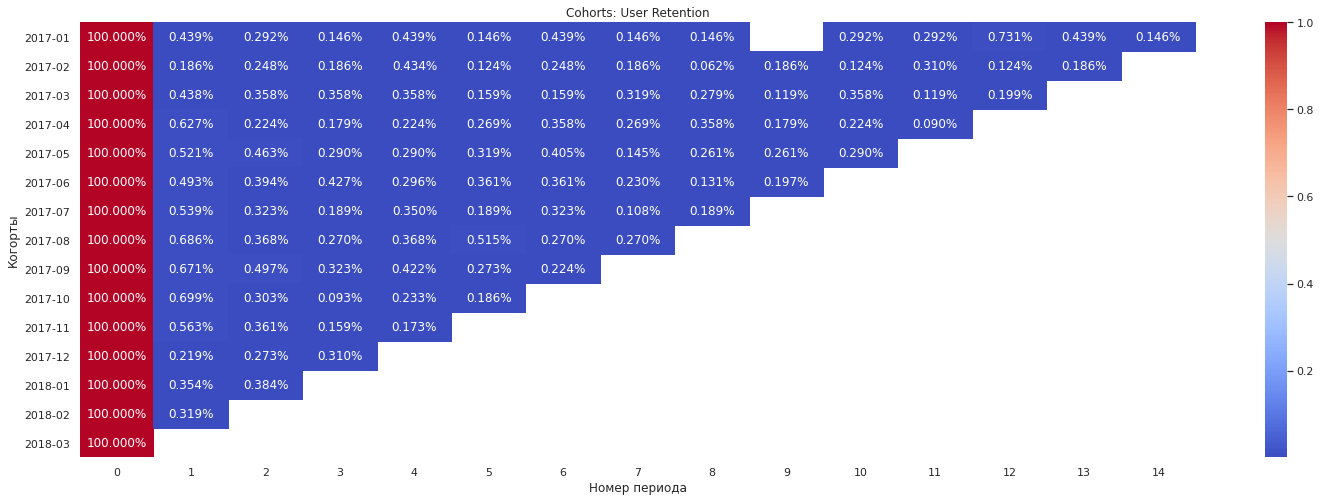

In [76]:
# annot=True - выводит процент в ячейкках
# fmt='.3%' - оставляет 3 знака после запятой
# cmap='coolwarm' - цветовая гамма, на графике все получилось темно синим, так как очень низкие цифры, все меньше 1%
# так же настроил размер и название по осям и в заголовке

plt.figure(figsize=(25, 8))
sns.heatmap(retention_matrix, mask=retention_matrix.isnull(), annot=True, fmt='.3%', cmap='coolwarm')
plt.title('Cohorts: User Retention')
plt.xlabel('Номер периода')
plt.ylabel('Когорты')
plt.show();

In [77]:
# найдем, какая когорта является с самым высоким retention на третий месяц
print(f'В период с января по декабрь 2017 года когорта {retention_matrix[3].idxmax()} является с самым высоким retention на третий месяц.')

В период с января по декабрь 2017 года когорта 2017-06 является с самым высоким retention на третий месяц.


Так же еще можно заметить, что retention сильно низкий. Это говорит нам о том, что важно помнить, что ожидаемые значения удержания клиентов сильно различаются в зависимости от бизнеса: 3 покупки в год для одного продавца может быть много, а для другого — слишком мало. В нашем случае, только 2.93% пользователей совершило больше 1 покупки, поэтому по каждой когорте и в каждом периоде retention меньше 0.7%.

# Построить RFM-сегментацию пользователей

RFM-моделирование — это метод маркетингового анализа, используемый для оценки ценности клиента. RFM-моделирование основано на трех факторах:

Давность(recency): Как недавно клиент совершил покупку

Частота(frequency): Как часто клиент совершает покупку

Денежная стоимость(monetary): Сколько денег клиент тратит на покупки

Модель RFM позволяет получить числовые значения для трех вышеперечисленных показателей. Эти значения помогают компаниям лучше понять потенциал клиентов.

Для анализа возьмем пользователей, которые совершали покупки. Поэтому нам необходим факт оплаты товара и то, что он был доставлен пользователю. Следовательно, нас будут интересовать пользователи со статусом delivered. В ходе анализа, необходимо будет определить дату последней покупки, значит, определять ее будем по дате фактической оплаты заказа в столбце order_approved_at. Не у всех пользователей в данных со статусом delivered есть дата оплаты. Для анализа такие заказы(14 штук) необходимо удалить, так как мы не можем узнать, когда была совершена оплата.

Необходимо определить период, за который будем проводить анализ. Так как в этом бизнесе у компании редко покупают более чем один раз, следовательно лучше сделать анализ начиная с 2017 года, чтобы охватить больше пользователей и составить о них представление.

Посчитаем потраченную сумму в заказах

In [78]:
# сохраним данные в новой таблице, сгруппируем по заказам и посчитаем сумму
rfm_analys = order_items_df.groupby('order_id', as_index=False).agg({'price': 'sum'})

In [79]:
# объединяем таблички rfm_analys и orders_df, так соотнесем уникальный идентификатор заказа и позаказный номер
# inner join

rfm_analys = pd.merge(rfm_analys,
                      orders_df[['order_id', 'customer_id','order_status', 'order_approved_at']],
                     on='order_id')

In [80]:
# оставим только завершенные заказы, так как только такие считаются покупкой и отберем заказы, начиная с 2017-01
rfm_analys = rfm_analys.query('order_status == "delivered" and order_approved_at >= "2017-01"')

In [81]:
# проверим, остались ли только завершенные статусы
rfm_analys.order_status.unique()

array(['delivered'], dtype=object)

In [82]:
# удалим столбец order_status, так как остался только один статус
rfm_analys = rfm_analys.drop('order_status', axis=1)

In [83]:
# посмотрим, есть ли пропущенные значения и их нет
rfm_analys.isna().sum()

order_id             0
price                0
customer_id          0
order_approved_at    0
dtype: int64

In [84]:
# объединяем таблички rfm_analys и customers_df, так соотнесем пользователей и их заказы
# inner join

rfm_analys = pd.merge(rfm_analys,
                      customers_df[['customer_id', 'customer_unique_id']],
                      on='customer_id')

In [85]:
# группируем данные по уникальному номеру пользователя
# считаем потраченные деньги пользователя, находим последнюю дату, когда пользователь совершил покупку
# так же посчитаем количество совершенных заказов

rfm_analys = rfm_analys \
                .groupby('customer_unique_id', as_index=False) \
                .agg({'price': 'sum', 'order_approved_at': 'max', 'order_id': 'count'}) \
                .rename(columns={'order_approved_at': 'last_purchase', 'order_id': 'quantity'})

Необходимо узнать, как давно был совершен у каждого пользователя заказ. Смоделируем анализ, который я как бы делаю в реальном времени, установив дату now на один день после последней покупки, прибавим этот день, когда посчитаем разницу. Эта дата будет использоваться в качестве ориентира для расчета оценки последней покупки

In [86]:
# создадим новую колонку, куда запишем разницу между последней датой оплаты заказа из всех(now)
# и последней даты оплаты каждого пользователя
now = rfm_analys.last_purchase.max()
rfm_analys['days_diff'] = (now - rfm_analys.last_purchase).dt.days + 1

In [87]:
rfm_analys.head(2)

,customer_unique_id,price,last_purchase,quantity,days_diff
0,0000366f3b9a7992bf8c76cfdf3221e2,129.9,2018-05-10 11:11:18,1,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.9,2018-05-07 18:25:44,1,114


Деление на ранги

Для того, чтобы построить RFM-сегментацию пользователей, нам необходимо получить метрики по некоторым значениям. Это будут ранги, на которые мы будем делить пользователей. Для удобства, будем использовать для создания колонк, где будем хранить ранги метрик по пользователям, первые буквы: recency - r, frequency - f, monetary - m

Описание метрик:

r (насколько недавно была совершена последняя покупка клиента), ранг от 1 до 5 (5 - недавно, 1 - совсем давно)

f (как часто клиент совершает покупку), ранг от 1 до 3 (3 - часто, 1 - мало)

m (сколько денег тратит клиент), ранг от 1 до 5 (5 - много, 1 - мало)

Присвоим ранги для recency. Для этого разделим полученную разницу по дате на ранги, используем pd.qcut, получим 4 ранга, таким образом, недавняя дата будет с рангом 0, а поздняя с рангом 4, надо наоборот. Поэтому необходимо вычесть из 5, так как самая недавняя дата должна быть с рангом 5.

In [88]:
# создадим новый столбец, где будут записаны ранги для давности приобретения
rfm_analys['r'] = 5 - pd.qcut(rfm_analys['days_diff'], 5, labels=False)

Посмотрим, сколько покупок совершили пользователи, чтобы посмотреть, на какие ранги их можно разделить. Можно заметить, что большая часть совершила только одну покупку.

In [89]:
rfm_analys.quantity.value_counts()

1     90303
2      2561
3       180
4        28
5         9
6         5
7         3
15        1
9         1
Name: quantity, dtype: int64

In [90]:
# посмотрим, сколько пользователей совершили одну покупку
print(f'{round(100 * rfm_analys.query("quantity == 1").quantity.count() / rfm_analys.shape[0])}% пользователей совершили 1 покупку')

97% пользователей совершили 1 покупку


Для присвоения рангов для frequency, не получится использовать pd.qcut, так как очень много пользователей с 1 заказом и не сможет правильно разделить на ранги (97% пользователей совершили только 1 покупку), поэтому целесообразно будет использовать только 3 ранга.

In [91]:
# для этого создадим функцию, где для 1 заказа - ранг 1, для 2 заказов - ранг 2, а для всех остальных - ранг 3
def for_f(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    else:
        return 3

In [92]:
# используем созданную функцию, создадим новый столбец, где будут записаны ранги для частоты покупок
rfm_analys['f'] = rfm_analys['quantity'].apply(for_f)

Теперь разделим на ранги по потраченным суммам на покупки, используя pd.qcut. Необходимо прибавить 1, так как разделение будет начинаться с ранга 0 и до 4, а нам надо с 1 до 5.

In [93]:
# создадим новый столбец, где будут записаны ранги для потраченных сумм
rfm_analys['m'] = pd.qcut(rfm_analys['price'], 5, labels=False) + 1

In [94]:
# создадим новый столбец rfm_sum, сложив ранги по каждому пользователю
rfm_analys['rfm_sum'] = rfm_analys.r + rfm_analys.f + rfm_analys.m

In [95]:
# посмотрим, сколько пользователей и какой score получили
rfm_analys.rfm_sum.value_counts()

7     18207
8     14595
6     14251
5     11445
9     11030
10     7729
4      7596
3      4069
11     3787
12      332
13       50
Name: rfm_sum, dtype: int64

Нарисуем график распределения, чтобы было нагляднее видно, как распределились наши пользователи по сумме рангов. Можно заметить, что большинство пользователей скопилось около суммарной оценке 7.

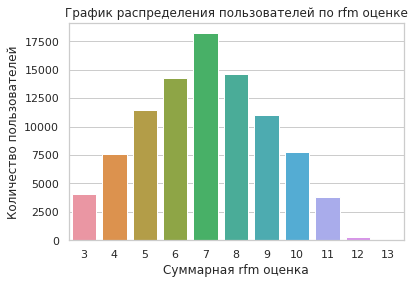

In [96]:
sns.countplot(data=rfm_analys, x='rfm_sum')
# дадим название графику
plt.title('График распределения пользователей по rfm оценке') 
# дадим название по оси х, y
plt.xlabel('Суммарная rfm оценка') 
plt.ylabel('Количество пользователей');

Оценки RFM-анализа дают нам 5х5х3 = 75 сегментов. С которым не просто работать. Поэтому выберем только 2. Так как frequency поделить на ранги равномерно не получилось, из-за того, что около 95% пользователей совершило только 1 покупку. Так же, в результате проведения когортного анализа на шаге выше можно это подтвердить, так как процент повторных покупок по всем когортам не превышает 1%. Поэтому целесообразно будет провести RM-анализ. Оценим распределение покупателей по параметрам Recency и Monetary. Это позволит выявить клиентов, которые приносят больше всего прибыли. И тех, чей вклад в общую прибыль незначителен.

Теперь сделаем разделение на сегменты:

Champions - Покупки были недавно и тратят больше всего

Potential Loyalist - Недавние клиенты со средней тратой

Loyal Customers - Клиенты покупают на регулярной основе и много тратят

New Customers - Купили совсем недавно, но не много

Promising - Недавние покупатели, но не потратили много

Need Attention - Выше среднего давность покупки и траты

About To Sleep - Выше средней давность покупки, но ниже средней траты

At Risk	- Покупали давно, но много тратили. Нужно вернуть их!

Can’t Lose Them	- Раньше тратили много, но давно не возвращались

Hibernating	- Последняя покупка была давно, скорее всего клиенты потеряны и их уже не вернуть

In [97]:
# создадим новую колонку RFM_Score, куда запишем общую оценку, соединив ранги
# переведем каждый ранг в строку и соединим
rfm_analys['RFM_Score'] = rfm_analys['r'].map(str) + rfm_analys['f'].map(str) + rfm_analys['m'].map(str)

Определяем сегменты на основе оценок, используя только Recency и Monetary. Заменять ранги на названия сегментов будем с использованием регулярных выражений. Каждому сегменту будет отведено свое значение (например: [1-2][1-2] - будет искать ранг 1 или 2 по r и 1 или 2 по m) и так для каждого будет передоваться свое имя.

In [98]:
# для начала запишем, для каких сегментов какие значения будут подходить и запишем это в переменную segt_map
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

# создадим новый столбец, куда в начале передадим соединенные ранги по r и m
rfm_analys['segment'] = rfm_analys['r'].map(str) + rfm_analys['m'].map(str)

# присвоим имена сегментам, которые записаны в переменной segt_map
rfm_analys['segment'] = rfm_analys['segment'].replace(segt_map, regex=True)
rfm_analys.head(3)

,customer_unique_id,price,last_purchase,quantity,days_diff,r,f,m,rfm_sum,RFM_Score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,129.9,2018-05-10 11:11:18,1,112,4,1,4,9,414,loyal customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.9,2018-05-07 18:25:44,1,114,4,1,1,6,411,promising
2,0000f46a3911fa3c0805444483337064,69.0,2017-03-10 21:05:03,1,537,1,1,2,4,112,hibernating


In [99]:
# посчитаем, как распределились пользователи по сегментам
rfm_analys.segment.value_counts()

hibernating            15822
loyal customers        15141
potential loyalists    14376
at risk                13899
about to sleep          7763
champions               7561
can't loose             7412
new customers           3869
promising               3702
need attention          3546
Name: segment, dtype: int64

Нарисуем график распределения, чтобы было нагляднее видно, как распределились наши пользователи по сегментам

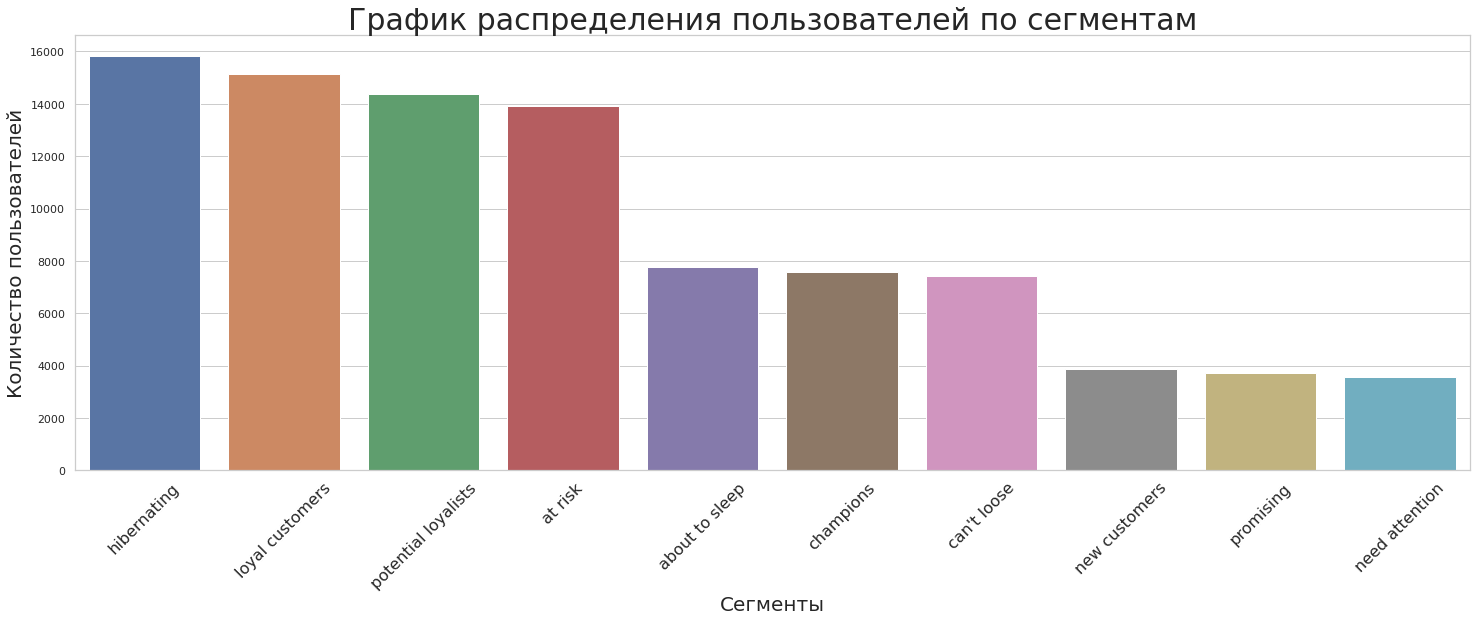

In [100]:
# увеличим размер графика
plt.figure(figsize=(25, 8))
# нарисуем график и сделаем сортировку
sns.countplot(data=rfm_analys, x='segment', order=rfm_analys.segment.value_counts().index)
# чтобы название сегментов было лучше видно, повернем их на 45 градусов и увеличим размер шрифта больше, используя параметр size
plt.xticks(rotation=45)
plt.xticks(size=16)
# дадим название графику и сделаем размер шрифта больше, используя параметр fontsize
plt.title('График распределения пользователей по сегментам', fontsize=30) 
# дадим название по оси х, y и сделаем размер шрифта больше, используя параметр fontsize
plt.xlabel('Сегменты', fontsize=20) 
plt.ylabel('Количество пользователей', fontsize=20);

Найдем среднее для каждого значания по сегментам и посчитаем количество пользователей в сегментах

In [101]:
rfm_level_agg = rfm_analys.groupby('segment').agg({
    'days_diff': 'mean',
    'quantity': 'mean',
    'price': ['mean', 'count']
}).round(2)

Для удобства переименуем название столбцов. RecencyMean - среднее по дням, FrequencyMean - среднее по кол-ву заказов, MonetaryMean - среднее по потраченным деньгам и все это в разрезе по каждому сегменту.

In [102]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']

Так мы получили таблицу, где нашли среднее значение по всем сегментам по дням, кол-ву покупок и потраченным деньгам, а также кол-во пользователей. Из таблицы видно, почему не использовалась Frequency для анализа, очень мало пользователей, которые совершили более 1 заказа.

In [103]:
rfm_level_agg

,RecencyMean,FrequencyMean,MonetaryMean,Count
segment,,,,
about to sleep,218.42,1.01,40.08,7763
at risk,389.05,1.03,115.33,13899
can't loose,392.36,1.07,409.00,7412
champions,45.92,1.08,270.61,7561
hibernating,394.15,1.01,41.09,15822
loyal customers,175.89,1.07,263.53,15141
need attention,220.43,1.02,90.30,3546
new customers,44.27,1.00,26.15,3869
potential loyalists,89.12,1.02,71.62,14376


В итоге можно сделать вывод, что много пользователей(15822) в сегменте hibernating, которых скорее всего уже не вернуть. С другой стороны, в сегментах champions(7561), potential loyalists(14376) и loyal customers(15141) находятся 37078 клиентов, которые приносят большую прибыль и делали покупку недавно. В сегментах new customers и promising находятся пользователи, которые мало потратили, но сделали покупку недавно. Сегмент can't loose(7412 клиентов) принес в среднем больше всех прибыли(409), но такие клиенты давно не делали приобретений, их стоит попробовать как-то привлечь и вернуть (например: скидки, акции и т.д.). На этот сегмент стоит обратить внимание, так как там находятся клиенты, готовые тратить деньги, но по какой-то причине они перестали это делать.

Теперь, за счет RFM-анализа можно разработать маркетинговые активности под каждый сегмент. Это может быть как серия рассылок, так и более широкая и комплексная кампания(например: скидки, акции, ретаргетинг рекламной кампании и т.д.). Таким образом, можно выстроить подход, при котором учитываются индивидуальные особенности каждого клиента.